## Kylie's Code for Matrix Factorization

In [10]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split


In [11]:
NUM_PRED = 5

In [12]:
df_songs = pd.read_csv("cleaned_data/csr_df.csv")
df_songs.shape

(15281, 13352)

In [13]:
random_sample = df_songs.sample(axis='columns')
print(random_sample)

       Wild
0         0
1         0
2         0
3         0
4         0
...     ...
15276     0
15277     0
15278     0
15279     0
15280     0

[15281 rows x 1 columns]


In [14]:
songs = df_songs.to_numpy()

In [15]:
x,y = songs.reshape((songs.shape[0], songs.shape[1])), range(songs.shape[0])

In [16]:
# Create a new user:
new_user_songs = ['Seven Nation Army', 'Already Dead']
# Create a new user row (all 0s, then set selected songs to 1)
new_user_row = np.zeros(songs.shape[1])
for song in new_user_songs:
    if song in df_songs.columns:
        new_user_row[df_songs.columns.get_loc(song)] = 1

In [17]:
list_of_songs = []

In [18]:
for i in range(5):
    rand = int(random.random()*100)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=rand)
    svd = TruncatedSVD(n_components=4, n_iter=7, random_state=rand)
    train_mat = svd.fit_transform(x_train)
    approx_matrix = np.dot(train_mat, svd.components_)

    new_user_mat = np.dot(new_user_row, svd.components_.T)
    new_predictions = np.dot(new_user_mat, svd.components_)
    recommendations = np.argsort(-new_predictions)
    recommendations = [i for i in recommendations][:NUM_PRED]
    recommended_songs = [df_songs.columns[i] for i in recommendations]

    print(f"{i+1}. Top Recommendations for New User:")
    print(recommended_songs)
    for song in recommended_songs:
        list_of_songs.append(song)

1. Top Recommendations for New User:
['All Work', 'Nothing Less', 'Juicy', 'So Close', 'In My Arms']
2. Top Recommendations for New User:
['Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'In My Arms']
3. Top Recommendations for New User:
['Juicy', 'All Work', 'We Got Love', 'Let Me See It', 'Nothing Less']
4. Top Recommendations for New User:
['Juicy', 'All Work', 'We Got Love', 'Nothing Less', 'In My Arms']
5. Top Recommendations for New User:
['Juicy', 'All Work', 'In My Arms', 'Nothing Less', 'We Got Love']


In [19]:
print(list_of_songs)

['All Work', 'Nothing Less', 'Juicy', 'So Close', 'In My Arms', 'Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'In My Arms', 'Juicy', 'All Work', 'We Got Love', 'Let Me See It', 'Nothing Less', 'Juicy', 'All Work', 'We Got Love', 'Nothing Less', 'In My Arms', 'Juicy', 'All Work', 'In My Arms', 'Nothing Less', 'We Got Love']


In [39]:
res = sorted(set(list_of_songs), key = lambda ele: list_of_songs.count(ele))
i = len(res)-NUM_PRED
while (i < len(res) - NUM_PRED - 1):
    print(i)

In [32]:
from scipy.spatial.distance import euclidean

# Euclidean distance to recommend songs based on how close they 
# are to the new user's preferences in latent space

distances = []
for i in range(train_mat.shape[0]):
    dist = euclidean(new_user_mat, train_mat[i])
    distances.append((df_songs.columns[i], dist))

# Sort by smallest distance
closest_songs_euc = sorted(distances, key=lambda x: x[1])[:NUM_PRED]
print("Songs closest to the new user:", [s[0] for s in closest_songs_euc])

Songs closest to the new user: ['The Pleasure Principle', "You're No Good", 'Starlight', 'NASA', 'When I Come Around']


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity: 
# Euclidean distance may not work well if the magnitude of vectors is very different, 
# so cosine similarity is often better for recommendation systems

similarities = cosine_similarity(new_user_mat.reshape(1, -1), train_mat)
recommended_indices = np.argsort(-similarities[0])[:NUM_PRED]
recommended_songs_cos = [df_songs.columns[i] for i in recommended_indices]

print("Recommended Songs using Cosine Similarity:", recommended_songs_cos)

Recommended Songs using Cosine Similarity: ["Don't Let Go (Love)", "You're No Good", 'Shadows Of The Night', 'Silence', 'Wanted Dead Or Alive']


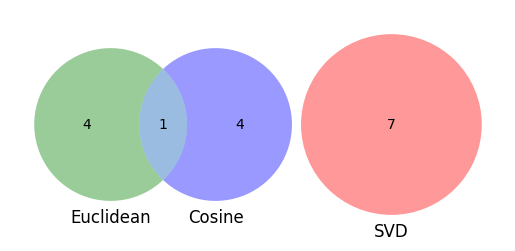

[{'Juicy', 'So Close', 'Let Me See It', 'In My Arms', 'Nothing Less', 'We Got Love', 'All Work'}]
[{'NASA', "You're No Good", 'When I Come Around', 'Starlight', 'The Pleasure Principle'}]
[{'Wanted Dead Or Alive', "You're No Good", 'Shadows Of The Night', 'Silence', "Don't Let Go (Love)"}]


In [ ]:
from matplotlib_venn import venn3

# Exploring how similar the outputs from the three methods are (how many recommended songs overlap)

recommended_songs_euc = [song[0] for song in closest_songs_euc]

# Create a Venn diagram
venn3([set(list_of_songs), set(recommended_songs_euc), set(recommended_songs_cos)], set_labels=('SVD', 'Euclidean', 'Cosine'))
plt.show()

print([set(list_of_songs)])
print([set(recommended_songs_euc)])
print([set(recommended_songs_cos)])